In [ ]:
#!pip install chart-studio
#!pip install swifter --user

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploring The Data

# Table of Contents

1. Dependencies and Datasets
    - 1.1. Importing Libraries
    - 1.2. Import Datasets
2. Confirmatory Data Analysis
    - 2.1. Data Info
    - 2.2. Missing Values
3. Exploratory Data Analysis
    - 3.1. What is the most rated movie?
    - 3.2. Which movie has the shortest and longest runtimes?
    - 3.3. Rating distribtion
    - 3.4. Which year has the highest release of movies?
    - 3.5. Which Genre Has The Highest Release Of Movies?
    - 3.6. Most Frequent Actor?
    - 3.7. Top 20 Director Who Directs Maximum Movies
    - 3.8. Most Popular Keyword

# 1. Dependencies and Datasets

## 1.1 Import Libraries
First we import all the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
init_notebook_mode(connected=True)
print('Packages Imported Successfully!')

Packages Imported Successfully!


## 1.2 Import the Data
Here we import the data we will be working with. The datasets we will be importing are as follows:
    
   - movies.csv as 'movies'
   - imdb_data.csv as 'imdb'
   - train.csv as 'ratings'

In [2]:
movies = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/movies.csv')
imdb = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/imdb_data.csv')
ratings = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/train.csv')
                      
print('Data Successfully imported!')

Data Successfully imported!


In [3]:
display(ratings)
display(movies)
display(imdb)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


The first thing we will do is merge our datasets into one dataframe. We will drop the 'timestamp' column as it plays no role in the upcoming analysis.

In [4]:
data = ratings.drop('timestamp', axis=1).merge(movies.merge(imdb, on ='movieId'),on='movieId')
print('Merges Successfull!')

Merges Successfull!


# 2. Confirmatory Data Analysis
Now we will take a look at our data to ensure that everything is as should be.
  - Data Info
    - The first and last five rows of the data
    - The shape of the dataframe, this includes the number of columns and rows
    - The names of the columns in the dataframe and their respective data types
  - Null values : number of cells with NaN values
   

## 2.1. Data Info

In [6]:
data.head()

,userId,movieId,rating,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [7]:
data.shape

(9633031, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   title          object 
 4   genres         object 
 5   title_cast     object 
 6   director       object 
 7   runtime        float64
 8   budget         object 
 9   plot_keywords  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 808.4+ MB


 ## 2.2. Missing Values
Now, let's see if we have any missing values in our dataset. 

Text(0, 0.5, 'Null Occurences')

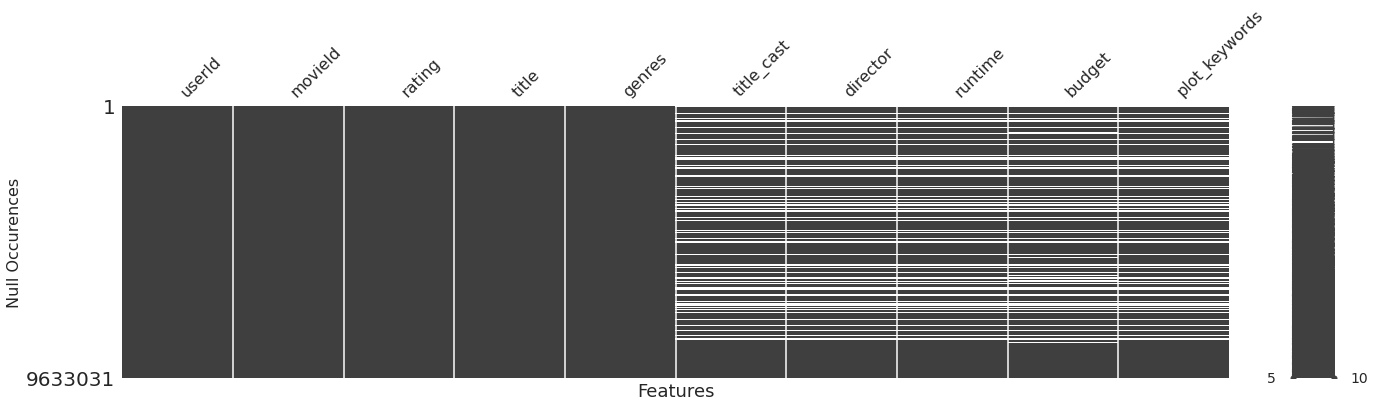

In [10]:
import missingno
missingno.matrix(data, figsize=(22,5))
plt.xlabel('Features', fontsize=18)
plt.ylabel('Null Occurences', fontsize=16)

As we can see from the visual above, the ***budget***, ***runtime***, ***title_cast*** and **director** columns have missing values. But this does not give any information on how many rows in these columns have missing values. We'll use the function defined below to show the number of missing values in each of the identified columns and what percentage of the data is missing.

In [11]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [12]:
missing_values_table(data)

Your selected dataframe has 10 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
budget,3152276,32.7
runtime,2653058,27.5
plot_keywords,2610043,27.1
title_cast,2604407,27.0
director,2602688,27.0


The number of missing values in these columns is not so high that it could affect our analysis of the data. The only column we will be using that will be affected is the ***runtime*** column. What we will do is  impute all the missing values in this column with the mean of the data

In [13]:
data['runtime'].fillna(data['runtime'].mean(), inplace=True)

As we can see below, the ***runtime*** column does not appear to be on the list of columns with missing values.

In [14]:
missing_values_table(data)

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
budget,3152276,32.7
plot_keywords,2610043,27.1
title_cast,2604407,27.0
director,2602688,27.0


# 3. Exploratory Data Analysis
In this section we look at how our features interact to and relate with each other. The features we will be using in our analysis are:
  - Title
  - Title Cast
  - Runtime
  - Director
  - Genres
  - Year, which we will create
  - Plot Keywords

In [15]:
data.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'title_cast',
       'director', 'runtime', 'budget', 'plot_keywords'],
      dtype='object')

## 3.1. What is the most rated movie?
Let's look at the titles/movies that have the hughest number of ratings

In [16]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
result = data[data['title'].isin(data[data.duplicated(['title'])]['title'])]
result.sort_values('title')

,userId,movieId,rating,title,genres,title_cast,director,runtime,budget,plot_keywords
9532427,156067,51372,0.5,"""Great Performances"" Cats (1998)",Musical,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician
9532422,28522,51372,2.5,"""Great Performances"" Cats (1998)",Musical,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician
9532423,22836,51372,5.0,"""Great Performances"" Cats (1998)",Musical,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician
9532424,39162,51372,3.5,"""Great Performances"" Cats (1998)",Musical,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician
9532425,47571,51372,0.5,"""Great Performances"" Cats (1998)",Musical,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician
...,...,...,...,...,...,...,...,...,...,...
9609333,72315,130640,2.0,貞子3D (2012),Horror,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...
9609332,71897,130640,4.0,貞子3D (2012),Horror,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...
9609331,71265,130640,4.0,貞子3D (2012),Horror,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...
9609330,73268,130640,1.0,貞子3D (2012),Horror,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...


In [17]:
# Most rated titles
most_rated = pd.DataFrame(data.groupby('title')['rating'].count().sort_values(ascending=False)).reset_index()

In [18]:
most_rated.rename(columns={'rating': 'num_of_ratings'}, inplace=True)
most_rated

,title,num_of_ratings
0,"Shawshank Redemption, The (1994)",32831
1,Forrest Gump (1994),32383
2,Pulp Fiction (1994),31697
3,"Silence of the Lambs, The (1991)",29444
4,"Matrix, The (1999)",29014
...,...,...
23529,Dynamite Girl (Dynamiittityttö) (1944),1
23530,To Get to Heaven First You Have to Die (Bihish...,1
23531,Crime at Porta Romana (1980),1
23532,Stockholm East (Stockholm Östra) (2011),1


From the dataframe we can see that **'Shawshank Redemption, The (1994)'** has the most ratings, **32 831**. Now, let's visualize this information.

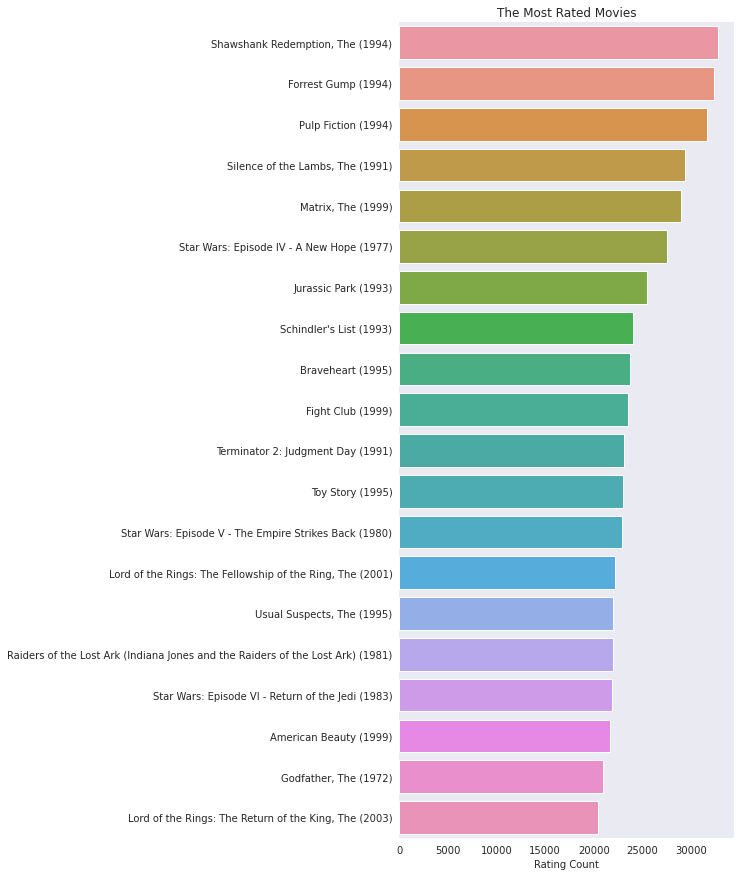

In [20]:

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data=most_rated[0:20],y='title',x='num_of_ratings')
# Add a legend and informative axis label
ax.set(ylabel="",
       xlabel="Rating Count")
ax.title.set_text('The Most Rated Movies')
sns.despine(left=True, bottom=True)

## 3.2. Which movies have the shortest and longest runtime?


Let's first take a look at what the average runtime of movies in our dataset is.

In [21]:
# calculate the average movie duration
round(data['runtime'].mean(),2)

116.1

The average runtime is 116.1. This equates to ~1.9 hours, which is a normal runtime for movies. Next, let's look at the average rating movies that are more than and less than two hours long. 

In [22]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print('Avg. star rating for movies 2 hours or longer: ', round(data[data['runtime'] >= 120]['rating'].mean(),2), 
 '\nAvg. star rating for movies shorter than 2 hours: ', round(data[data['runtime'] < 120]['rating'].mean(),2))

Avg. star rating for movies 2 hours or longer:  3.66 
Avg. star rating for movies shorter than 2 hours:  3.49


From our research we found that 'Cleopatra (1963)', is the longest Hollywood movie ever released with a runtime of 248, which is ~4 hours and 8 minutes. We will use this as a benchmark and only select movies that are shorter than this to run our analysis. This is due to the fact that in our dataset we found that there are also short television series. So to eliminate any error we will remove them from consideration.

In [23]:
df = data[data['runtime'] <= 248] 

In [24]:
df.head()

,userId,movieId,rating,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [25]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('runtime')

Movie Which Has Highest runtime :  My Voyage to Italy (Il mio viaggio in Italia) (1999)
Movie Which Has Lowest runtime  :  Stille Nacht I: Dramolet (1988)


,8148250,9438402
userId,160506,124638
movieId,8755,126050
rating,3,2.5
title,My Voyage to Italy (Il mio viaggio in Italia) ...,Stille Nacht I: Dramolet (1988)
genres,Documentary,Animation
title_cast,Martin Scorsese,NaN
director,Suso Cecchi D'Amico,Stephen Quay
runtime,246,1
budget,NaN,NaN
plot_keywords,film history|filmmaking|italian cinema|italian...,magnet|doll|spoon|moth


AS we can see, ***'My Voyage to Italy (Il mio viaggio in Italia) (1999)'***  has the longest runtime and ***'Stille Nacht I: Dramolet (1988)'*** has the shortest runtime. Next we will extract the top 10 longest movies.

In [26]:
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['title']
info.drop_duplicates(inplace = True)
info.reset_index(drop=True, inplace=True)

In [27]:
info

,runtime,original_title
0,246.0,My Voyage to Italy (Il mio viaggio in Italia) ...
1,244.0,At Berkeley (2013)
2,242.0,Hamlet (1996)
3,240.0,"Beach Boys: An American Family, The (2000)"
4,240.0,Bonnie and Clyde (2013)
...,...,...
23496,1.0,Four Heads Are Better Than One (Un homme de tê...
23497,1.0,The Kiss (1900)
23498,1.0,Dickson Greeting (1891)
23499,1.0,Santa Claus (1898)


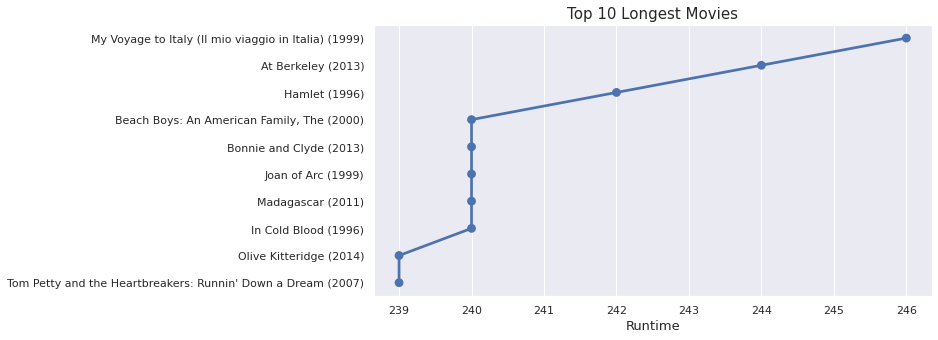

In [29]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
#info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
#info['original_title'] = df['title']
df2 = list(map(str,(info['original_title'])))
x = list(df2[:10])
y = list(info['runtime'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(20,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")


## 3.3. Rating distribution
Let us now look at how the movie ratings are distributed.

In [30]:
# The minimum and maximum ratings given by the users

print('The minimum rating given is:',data['rating'].min())
print('The maximum rating given is:',data['rating'].max())

The minimum rating given is: 0.5
The maximum rating given is: 5.0


Average rating in dataset: 3.5333951730983424


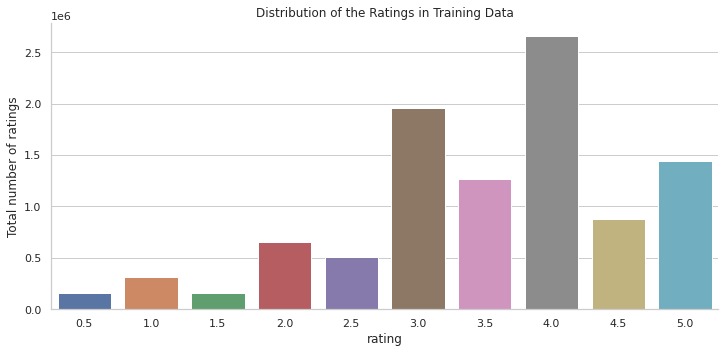

In [31]:
with sns.axes_style('whitegrid'):
    g = sns.catplot("rating", data=ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
    plt.title('Distribution of the Ratings in Training Data')
print (f'Average rating in dataset: {np.mean(ratings["rating"])}')

In [32]:
# Function creates ranges for ratings
# To be used for visualisations

def rating_range(text):
  
  if int (text) < 1:
    return '0-1'
  elif int (text) <2:
    return'1-2'
  elif int (text) <3:
    return '2-3'
  elif int (text) <4:
    return '3-4'
  else:
    return '4-5'

In [33]:
# Generate a movie_rating dataframe

movie_rating=data.groupby(['title'])['rating'].mean() # agg rating by mean
movie_rating=pd.DataFrame(movie_rating)
movie_rating

,rating
title,
"""Great Performances"" Cats (1998)",2.753731
$ (Dollars) (1971),2.875000
$5 a Day (2008),3.125000
$9.99 (2008),3.222222
$ellebrity (Sellebrity) (2012),2.250000
...,...
À nous la liberté (Freedom for Us) (1931),3.746914
À propos de Nice (1930),3.200000
Árido Movie (2005),3.000000


In [34]:
pd.DataFrame(movie_rating.sort_values(by='rating', ascending=False))

,rating
title,
Wrestling for Jesus: The Tale of T-Money (2011),5.0
The... Beautiful Country (1977),5.0
Only Daughter (2013),5.0
Vasermil (2007),5.0
"Day the Universe Changed, The (1985)",5.0
...,...
Time to Kill (Tempo di uccidere) (1989),0.5
"Dangerous Place, A (2012)",0.5
Dana Carvey: Squatting Monkeys Tell No Lies (2008),0.5


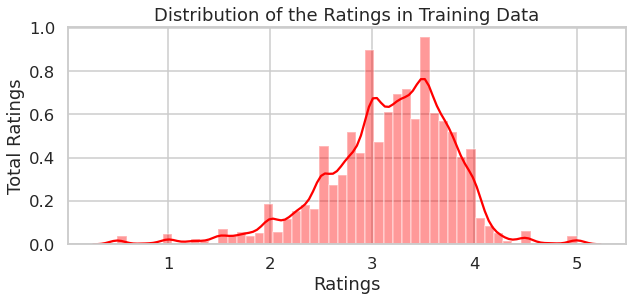

In [35]:
#Plot distribution of ratings on scale 0-5

plt.figure(figsize=(10,4))
sns.set(style="whitegrid", context="talk")
sns.distplot(movie_rating['rating'],bins=50,kde=True,color='red')
plt.title('Distribution of the Ratings in Training Data')
plt.xlabel('Ratings') 
plt.ylabel('Total Ratings')   
plt.show()

Now that we know the distribution of the ratings, let's group them into categories. This will make for a better analysis.

In [36]:
# Apply rating_range function to generate a range column

movie_rating['range']=movie_rating['rating'].apply(rating_range)
movie_rating

,rating,range
title,,
"""Great Performances"" Cats (1998)",2.753731,2-3
$ (Dollars) (1971),2.875000,2-3
$5 a Day (2008),3.125000,3-4
$9.99 (2008),3.222222,3-4
$ellebrity (Sellebrity) (2012),2.250000,2-3
...,...,...
À nous la liberté (Freedom for Us) (1931),3.746914,3-4
À propos de Nice (1930),3.200000,3-4
Árido Movie (2005),3.000000,3-4


In [38]:
# Generate column to sum number of ratings per title

movie_rating['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

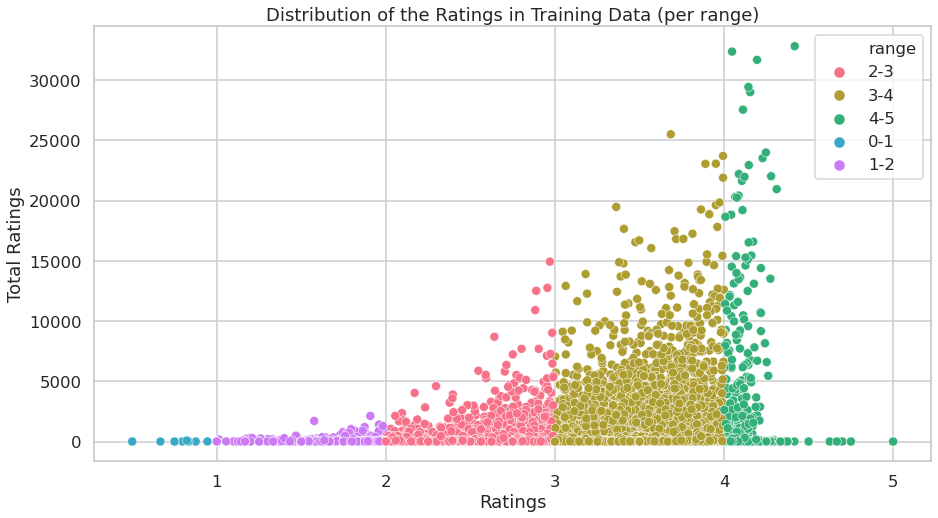

In [40]:
# Plot scatter plot illustrating the relationship between ratings and number of ratings

sns.set(style="whitegrid", context="talk")
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=movie_rating['rating'], y=movie_rating['num_of_ratings'],
hue=movie_rating['range'],palette="husl",sizes=(1, 8), linewidth=0.5,data=movie_rating, ax=ax) # range used to categorise ratings
plt.title('Distribution of the Ratings in Training Data (per range)')
plt.xlabel('Ratings') 
plt.ylabel('Total Ratings') 
plt.show()

## 3.4. Which year has the highest release of movies?
Before we can do our analysis, we have to extract the year each movie was released from the titles and save them in a new column.

In [41]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don’t conflict with movies that have years in their titles
movies['year'] = movies['title'].str.extract("(\(\d\d\d\d\))",expand=False)
#Removing the parentheses
movies['year'] = movies['year'].str.extract("(\d\d\d\d)",expand=False)
#Removing the years from the ‘title’ column
movies['title'] = movies['title'].str.replace("(\(\d\d\d\d\))", "")
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())

Now, let's change the column to a datetime format.

In [42]:
pd.to_datetime(movies.year, format='%Y')

0       1995-01-01
1       1995-01-01
2       1995-01-01
3       1995-01-01
4       1995-01-01
           ...    
62418   2018-01-01
62419   2001-01-01
62420   2018-01-01
62421   2001-01-01
62422   1962-01-01
Name: year, Length: 62423, dtype: datetime64[ns]

Next, we create a dataframe that returns the number of movies that were released in each year.

In [43]:
year_df = pd.DataFrame(movies.groupby('year')['title'].count()).reset_index()

In [44]:
year_df.head()

,year,title
0,1874,1
1,1878,1
2,1880,1
3,1883,1
4,1887,1


In [45]:
year_df.rename(columns={'title': 'num_of_titles'}, inplace=True)
year_df.sort_values(by='year', ascending=False)

,year,num_of_titles
134,2019,994
133,2018,2034
132,2017,2374
131,2016,2488
130,2015,2513
...,...,...
4,1887,1
3,1883,1
2,1880,1
1,1878,1


In [46]:
trace1 = go.Scatter(x=year_df.year,
                    y=year_df.num_of_titles,
                    name = 'Number of Movies Released per Year, 1874-2019',
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='Number of Movies Released per Year, 1874-2019',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

From the graph above we can see that there was an evident semi-exponential increase in the number of movies released from 1874 to 2015, at which point, the number of movies released each year until 2019 drops drastically. Finaly, let's group the years into three time periods: ***1800s***, ***1900s*** and ***2000s***.

In [47]:
 def era(year):
    if int(year) < 1899:
        return '1800s'
    elif int(year) < 1999:
        return '1900s'
    else:
        return '2000s'
    

In [49]:
year_df['period'] = year_df['year'].apply(era)

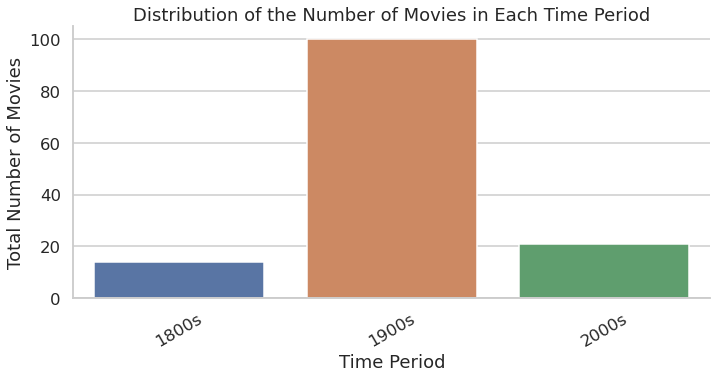

In [50]:

with sns.axes_style('whitegrid'):
    
    g = sns.catplot("period", data=year_df, aspect=2.0,kind='count')
    g.set_ylabels("Total Number of Movies")
    g.set_xlabels("Time Period")
    plt.title('Distribution of the Number of Movies in Each Time Period')
    plt.xticks(rotation=30)
    #f, ax = plt.subplots(figsize=(25, 8))

From the graph above, we can see that a large proportion of all the movies in our dataset was released in the ***1900s***, let's take a deeper look into that. We will split the time period into decades.

In [57]:
def decades(year):
    if int(year) < 1910:
        return 'Turn of the Century'
    elif int(year) < 1920:
        return 'Early Nineteen-Hundreds'
    elif int(year) < 1930:
        return 'Tweties'
    elif int(year) < 1940:
        return 'Thirties'
    elif int(year) < 1950:
        return 'Forties'
    elif int(year) < 1960:
        return 'Fifties'
    elif int(year) < 1970:
        return 'Sixties'
    elif int(year) < 1980:
        return 'Seventies'
    elif int(year) < 1990:
        return 'Eighties'
    elif int(year) < 2000:
        return 'Nineties'

In [55]:
decade = year_df[year_df['period'] == '1900s']
decade

,year,num_of_titles,period
14,1899,8,1900s
15,1900,22,1900s
16,1901,12,1900s
17,1902,6,1900s
18,1903,26,1900s
...,...,...,...
109,1994,645,1900s
110,1995,705,1900s
111,1996,703,1900s
112,1997,792,1900s


In [58]:
decade['decade'] = decade['year'].apply(decades)
decade

,year,num_of_titles,period,decade
14,1899,8,1900s,Turn of the Century
15,1900,22,1900s,Turn of the Century
16,1901,12,1900s,Turn of the Century
17,1902,6,1900s,Turn of the Century
18,1903,26,1900s,Turn of the Century
...,...,...,...,...
109,1994,645,1900s,Nineties
110,1995,705,1900s,Nineties
111,1996,703,1900s,Nineties
112,1997,792,1900s,Nineties


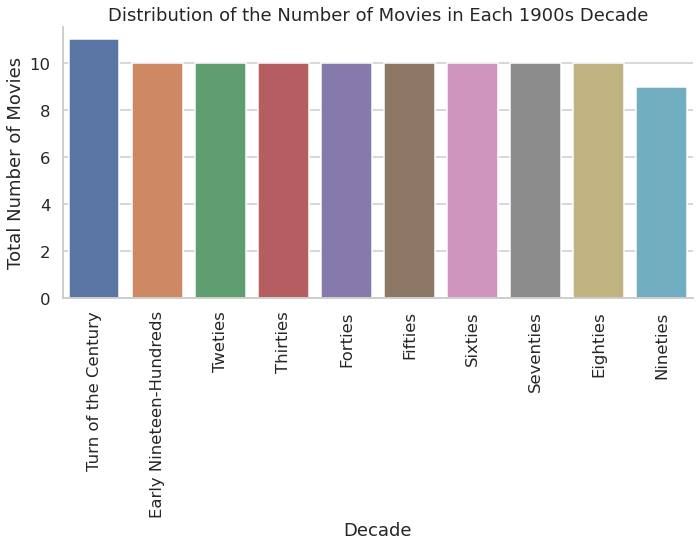

In [60]:
with sns.axes_style('whitegrid'):
    
    g = sns.catplot("decade", data=decade, aspect=2.0,kind='count')
    g.set_ylabels("Total Number of Movies")
    g.set_xlabels("Decade")
    plt.title('Distribution of the Number of Movies in Each 1900s Decade')
    plt.xticks(rotation=90)

## 3.5. Which Genre Has The Highest Release Of Movies?
We will start by defining a funtion to isolate each genre as there are more than one in most rows.

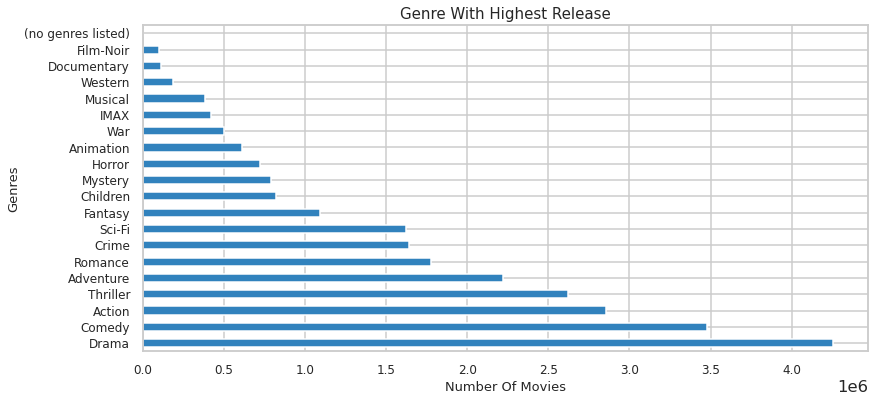

In [61]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = data[x].str.cat(sep = '|')
    df = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

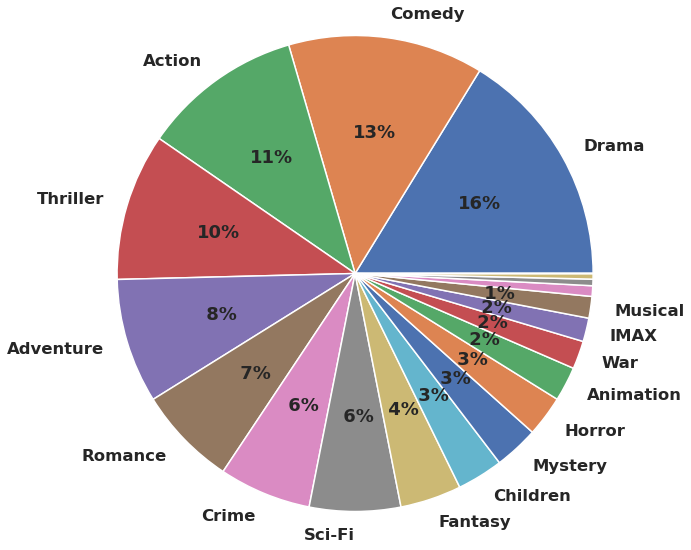

In [63]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10, 8))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()


## 3.6. Most Frequent Actor?
Let us see which actors appear the most in our dataset. We will use the same function as above.

In [64]:
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = imdb[x].str.cat(sep = '|')
    df = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

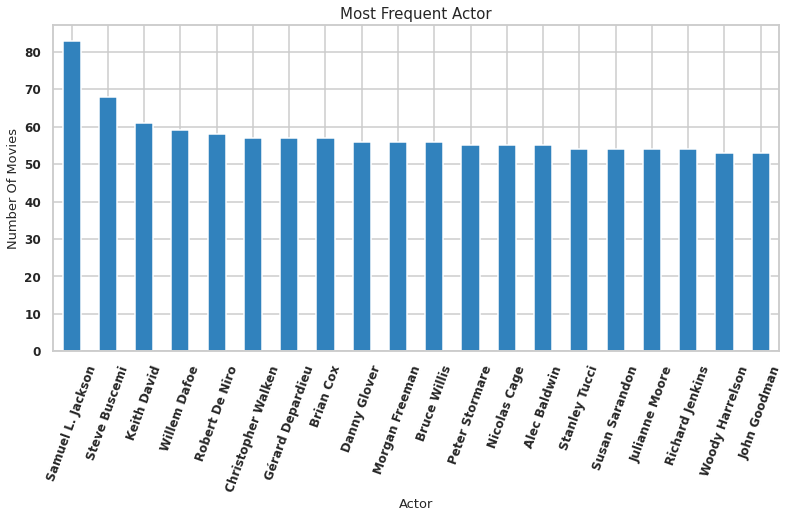

In [65]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_films = count_genre('title_cast')

#plot the barh plot.
count_actor_films.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

## 3.7. Top 20 Director Who Directs Maximum Movies

In [84]:
count_director_movies =  pd.DataFrame(imdb.groupby('director')['movieId'].count()).reset_index()
count_director_movies.rename(columns={'movieId':'title_count'}, inplace=True)
count_director_movies = count_director_movies.sort_values(by='title_count', ascending=False)

In [85]:
count_director_movies

,director,title_count
9993,See full summary,28
11574,Woody Allen,26
6774,Luc Besson,26
10353,Stephen King,24
11537,William Shakespeare,19
...,...,...
4454,Jacek Borcuch,1
4455,Jacek Bromski,1
4456,Jacek Wyszomirski,1
4457,Jack Amiel,1


Above we have a dataframe showing directors and the number of movies each of them directed. We will ignore the first entry as it does not give any valuable or interpretable informations. Below we will visualise this information.

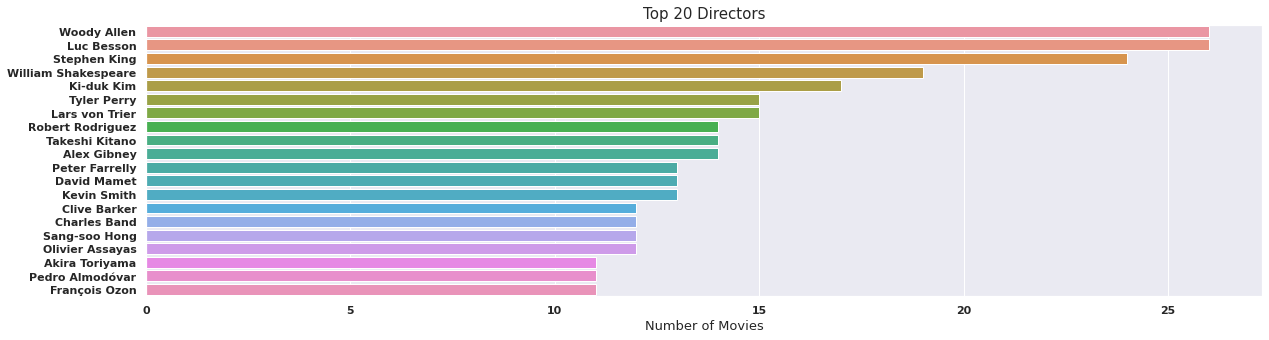

In [90]:
df3 = list(map(str,(count_director_movies['director'])))
x = list(df3[1:21])
y = list(count_director_movies['title_count'][1:21])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.barplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(20,5)})
#setup the title and labels of the plot.
ax.set_title("Top 20 Directors",fontsize = 15)
ax.set_xlabel("Number of Movies",fontsize = 13)
sns.set_style("darkgrid")

## 3.8. Most Popular Keyword

Let's look at the plot keywords that appear the most in our dataset.

In [75]:
#imdb['plot_keywords'] = imdb['plot_keywords'].fillna(imdb['plot_keywords'].mode(), inplace=True)
keywords = count_genre('plot_keywords')

i = 0
keyword_occurences = []
for p in keywords.index:
    keyword_occurences.append([p, keywords[i]])
    i = i+1

In [76]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


(-0.5, 999.5, 299.5, -0.5)

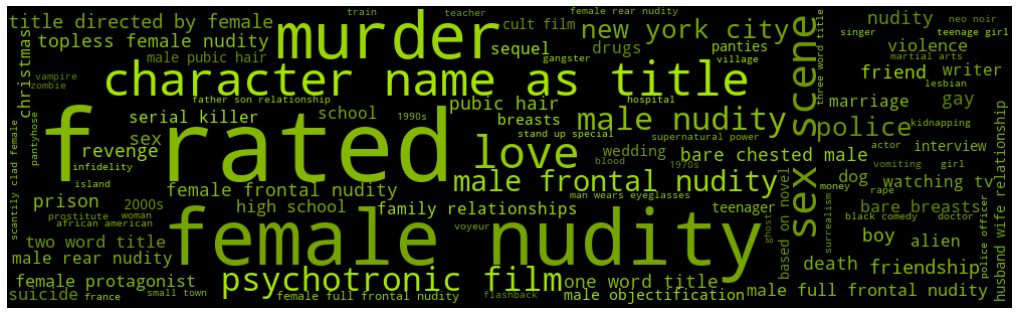

In [77]:
from wordcloud import WordCloud, STOPWORDS
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')